## E.coli 1st strategy model analysis 

In [1]:
from cobra.io import read_sbml_model
from cobra.io import write_sbml_model
from cobra import Reaction, Metabolite
import pandas as pd

In [2]:
# Importing model
model = read_sbml_model('../data/iML1515_5htp_1st_strategy.xml')

## General check of model

**Checking max 5-HTP production and respective growth rate if objective value is changed to the 5-HTP export reaction**

In [3]:
# Finding the flux of the phhA reaction
with model:
    print(model.reactions.phhA)
    model.objective = model.reactions.phhA
    solution = model.optimize()
    max_5HTP_production = solution.objective_value
    print("HTP flux", max_5HTP_production)
    print("Biomass flux", solution.fluxes.BIOMASS_Ec_iML1515_core_75p37M)

phhA: o2_c + thmnp_c + trp__L_c --> hthpth_c + htrp_c
HTP flux 4.2792043399638375
Biomass flux 0.0


It was observed that when the optimal flux goes towards 5-HTP production, then there will be no flux towards biomass production, thus no growth of the cell.

## Observing changes in growth rate with increasing 5-HTP export flux

In [4]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [5]:
ppp_5HTP = production_envelope(model,
                    reactions=[model.reactions.phhA],
                    objective=model.reactions.BIOMASS_Ec_iML1515_core_75p37M)

In [6]:
ppp_5HTP

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,phhA
0,EX_glc__D_e,0.0,0.0,NaN,0.876997,1.161751e+01,NaN,0.000000
1,EX_glc__D_e,0.0,0.0,NaN,0.831248,1.101147e+01,NaN,0.225221
2,EX_glc__D_e,0.0,0.0,NaN,0.785499,1.040543e+01,NaN,0.450443
3,EX_glc__D_e,0.0,0.0,NaN,0.739749,9.799397e+00,NaN,0.675664
4,EX_glc__D_e,0.0,0.0,NaN,0.694000,9.193359e+00,NaN,0.900885
5,EX_glc__D_e,0.0,0.0,NaN,0.647766,8.580901e+00,NaN,1.126106
6,EX_glc__D_e,0.0,0.0,NaN,0.601497,7.967979e+00,NaN,1.351328
7,EX_glc__D_e,0.0,0.0,NaN,0.555228,7.355058e+00,NaN,1.576549
8,EX_glc__D_e,0.0,0.0,NaN,0.508959,6.742136e+00,NaN,1.801770
9,EX_glc__D_e,0.0,0.0,NaN,0.462690,6.129215e+00,NaN,2.026992


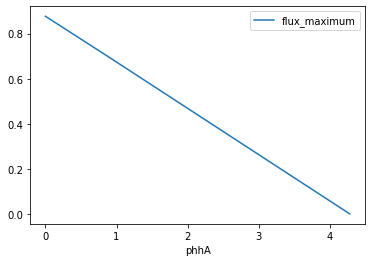

In [7]:
ppp_5HTP.plot(x='phhA', y='flux_maximum')

No satisfying results, the correlation between the biomass growth and max 5-HTP production is strongly negative.

## Knocking out a single gene and setting the objective value of the model for 5-HTP export flux

Only non-zero biomass production flux knock-outs are selected

In [8]:
for gene in model.genes:
    with model:
        gene.knock_out()
        model.objective = model.reactions.phhA
        solution = model.optimize()
        if solution.fluxes.BIOMASS_Ec_iML1515_core_75p37M > 0:
            print ('5-HTP export flux:', solution.fluxes.tph, 'Gene ID:', gene.id, 'Biomass production:', solution.fluxes.BIOMASS_Ec_iML1515_core_75p37M)

No solutions displayed, no single knock-outs and optmization to maximum 5-HTP production yields positive growth rate

Only non-zero 5-HTP export flux knock-outs are selected

In [9]:
knock_out_list = pd.DataFrame(columns=['Gene ID', '5-HTP export flux', 'Biomass production flux'])
for gene in model.genes:
    with model:
        gene.knock_out()
        solution = model.optimize()
        if solution.fluxes.phhA > 0:
            knock_out_list = knock_out_list.append({ 'Gene ID': gene.id, '5-HTP export flux': solution.fluxes.phhA, 'Biomass production flux': model.optimize().objective_value}, ignore_index=True)

In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
print(knock_out_list)

Empty DataFrame
Columns: [Gene ID, 5-HTP export flux, Biomass production flux]
Index: []


<ipython-input-10-f4d78eb1eacc>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


No solutions, no single knock-outs give rise to positive htp flux with maximum growth rate

## Changing the boundaries for chorismate conversion to prephenate

The idea behind this part is to restrict and control the flow of chorismate, a precursor of L-tryptophane and 5-HTP, to other aromatic amino acid production. For this we are setting bounds for a CHORM reaction (chorismate --> prephenate), where we are changing the lower bound to be above 0, so that some chorismate is routed for other essential amino acids in the biomass reaction to ensure growth, and the higher bound ensures we are not depleting the precursor pool for 5-HTP.

In [11]:
for metabolite in model.metabolites.query('Chorismate', 'name'):
    print(metabolite.name, metabolite.id)

Chorismate chor_c


In [12]:
for reaction in model.metabolites.chor_c.reactions:
    print(reaction)

BIOMASS_Ec_iML1515_WT_75p37M: 0.000223 10fthf_c + 0.000223 2dmmql8_c + 2.5e-05 2fe2s_c + 0.000248 4fe4s_c + 0.000223 5mthf_c + 0.000279 accoa_c + 0.000223 adocbl_c + 0.499149 ala__L_c + 0.000223 amet_c + 0.28742 arg__L_c + 0.234232 asn__L_c + 0.234232 asp__L_c + 75.55223 atp_c + 2e-06 btn_c + 0.004952 ca2_c + 0.000223 chor_c + 0.004952 cl_c + 0.002944 clpn160_p + 0.00229 clpn161_p + 0.00118 clpn181_p + 0.000168 coa_c + 2.4e-05 cobalt2_c + 0.008151 colipa_e + 0.129799 ctp_c + 0.000674 cu2_c + 0.088988 cys__L_c + 0.024805 datp_c + 0.025612 dctp_c + 0.025612 dgtp_c + 0.024805 dttp_c + 0.000223 enter_c + 0.000223 fad_c + 0.006388 fe2_c + 0.007428 fe3_c + 0.255712 gln__L_c + 0.255712 glu__L_c + 0.595297 gly_c + 0.154187 glycogen_c + 0.000223 gthrd_c + 0.209121 gtp_c + 70.028756 h2o_c + 0.000223 hemeO_c + 0.092056 his__L_c + 0.282306 ile__L_c + 0.18569 k_c + 0.437778 leu__L_c + 3e-06 lipopb_c + 0.333448 lys__L_c + 3.1e-05 malcoa_c + 0.149336 met__L_c + 0.008253 mg2_c + 0.000223 mlthf_c + 0.0

In [13]:
#here we do not change the bounds for chorismate conversion. The objective value is set up for biomass production.
with model:
    model.reactions.phhA.bounds = 1, 1000 #adding a lower bound on phhA flux to enforce some 5-HTP production (around 25% of max value)
    solution = model.optimize()
    print('Max 5-HTP:', solution.fluxes.phhA)
    print('Growth:', solution.fluxes.BIOMASS_Ec_iML1515_core_75p37M)
    print('CHORM:', solution.fluxes.CHORM)

Max 5-HTP: 1.0
Growth: 0.6736729353453077
CHORM: 0.217855048523707


In [14]:
#here we try to keep chorismate conversion below the value in the above example to see the effect on the the 5-HTP and biomass production.
#The objective value is biomass production.
with model:
    model.reactions.phhA.bounds = 1, 1000 #keeping the lower bound for 5-HTP production above 0 so that the cell does not ditch the reaction (around 25% of max value)
    model.reactions.CHORM.bounds = 0.001, 0.2
    solution = model.optimize()
    print('Max 5-HTP:', solution.fluxes.phhA)
    print('Growth:', solution.fluxes.BIOMASS_Ec_iML1515_core_75p37M)
    print('CHORM:', solution.fluxes.CHORM)

Max 5-HTP: 1.0
Growth: 0.6184597877446011
CHORM: 0.2


When biomass is selected as an objective value and 5-HTP flux is forsed to be at least 1, biomass production is still impaired when CHORM reaction is limited. The 5-HTP flux at the same time does not get above the lower bound, thus it can be concluded that redirecting the flux of chorismate from phenylalanine and tyrosine production towards the tryptophan production does not increase the yield of 5-HTP.

## Optmizing 5-HTP production and growth rate

In [15]:
from cobra.flux_analysis import flux_variability_analysis

In [16]:
hydroxy_trp_flux_analysis = flux_variability_analysis(model, model.reactions.phhA, fraction_of_optimum = 0.5)
print(hydroxy_trp_flux_analysis)

      minimum   maximum
phhA  0.0      2.144746


In [17]:
hydroxy_trp_flux_analysis = float(flux_variability_analysis(model, model.reactions.phhA, fraction_of_optimum = 0.5)["maximum"][0])
print(hydroxy_trp_flux_analysis)

2.1447464147568795


Keeping growth rate at 50%, we get around 50% of maximum 5-HTP flux, which is the same result as when optimizing for both fluxes.

In [18]:
# Getting the flux towards 5-HTP and biomass respectively, when optimized for both reactions
with model:
    model.objective = {model.reactions.phhA: 0.5}
    solution = model.optimize()
    print("5-HTP flux", solution.objective_value)
    model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
    solution = model.optimize()
    print("Biomass flux", solution.objective_value)

5-HTP flux 2.1396021699819148
Biomass flux 0.4384986072134816


We can see here that the flux towards biomass and 5-HTP production are both half of their previous optimal flux, which make sense now that they share the flux

## Influence of carbon source at maximum 5-HTP flux

In [19]:
#create list to store the reactions' IDs
carbon_uptake = list()

#go through all metabolites in the model that have carbon in their chem.structure
for metabolite in model.metabolites:
    if 'C' in metabolite.elements:
        #find metabolites that are external
        if metabolite.id[-1] == 'e':
            reactions = metabolite.reactions
            #pick reactions which exchange the metabolite with the external environment
            for element in reactions:
                if str(element.id[:2]) == 'EX':
                    carbon_uptake.append(element.id)

In [20]:
for reaction in carbon_uptake:
    print(reaction, "with the name: ", model.reactions.get_by_id(reaction).name)


EX_co2_e with the name:  CO2 exchange
EX_akg_e with the name:  2-Oxoglutarate exchange
EX_gsn_e with the name:  Guanosine exchange
EX_34dhpac_e with the name:  3,4-Dihydroxyphenylacetaldehyde exchange
EX_anhgm_e with the name:  N-Acetyl-D-glucosamine(anhydrous)N-Acetylmuramic acid exchange
EX_dms_e with the name:  Dimethyl sulfide exchange
EX_galctn__L_e with the name:  L-Galactonate exchange
EX_btn_e with the name:  Biotin exchange
EX_ocdcea_e with the name:  Octadecenoate (n-C18:1) exchange
EX_acmum_e with the name:  N-Acetylmuramate exchange
EX_adocbl_e with the name:  Adenosylcobalamin exchange
EX_novbcn_e with the name:  Novobiocin exchange
EX_feenter_e with the name:  Fe-enterobactin exchange
EX_arbtn_e with the name:  Aerobactin minus Fe3 exchange
EX_gln__L_e with the name:  L-Glutamine exchange
EX_cpgn_un_e with the name:  Coprogen unloaded (no Fe(III)) exchange
EX_tre_e with the name:  Trehalose exchange
EX_alaala_e with the name:  D-Alanyl-D-alanine exchange
EX_idon__L_e with

In [21]:
model.medium

{'EX_pi_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_zn2_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_sel_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_tungs_e': 1000.0,
 'EX_slnt_e': 1000.0}

In [22]:
medium = model.medium


#replace glucose with each exchange reaction from the possible carbon source reactions
for reaction in carbon_uptake:
    medium = model.medium
    with model:
        medium['EX_glc__D_e'] = 0
        medium[reaction] = 10
        model.medium = medium
        model.objective = model.reactions.phhA
        solution = model.optimize()
        max_5HTP_production = solution.objective_value
        if solution.fluxes.BIOMASS_Ec_iML1515_core_75p37M > 0:
            print(solution.fluxes.BIOMASS_Ec_iML1515_core_75p37M)
            print(max_5HTP_production)

/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/sit

/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/sit

/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


No solutions, changing of medium does not influence the increase of growth rate at 5-HTP maximum flux production

## Influence of carbon source at optimal 5-HTP flux

Again working under the assumption that the production of 5-HTP and biomass needs to be shared 50-50, we will try and go through the list of potential carbon sources to see which carbon source will increase the flux towards both 5-HTP and biomass production.

In [23]:
# getting the max fluxes of 5-htp and biomass production on glucose
medium = model.medium
model.objective = {model.reactions.phhA: 0.5}
solution = model.optimize()
glucose_max_5htp = solution.objective_value
model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
solution = model.optimize()
glucose_max_biomass = solution.objective_value
count = 0

#replace glucose with each exchange reaction from the possible carbon source reactions
for reaction in carbon_uptake:
    # resetting the media after each change
    medium = model.medium
    with model:
        # setting the medium to the new carbon source
        medium['EX_glc__D_e'] = 0
        medium[reaction] = 10
        model.medium = medium
        # calculating max production of 5-htp and biomass
        model.objective = {model.reactions.phhA: 0.5}
        solution = model.optimize()
        max_5HTP_production = solution.objective_value
        model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
        solution = model.optimize()
        max_biomass_production = solution.objective_value
        # If the production is higher for both biomass and 5-htp production than using glucose as carbon source, then we print it
        if max_5HTP_production > glucose_max_5htp and max_biomass_production > glucose_max_biomass:
            count += 1
            print("optimal 5htp production using: ", model.reactions.get_by_id(reaction).name, "is ", max_5HTP_production)
            print("optimal biomass production using: ", model.reactions.get_by_id(reaction).name, "is ", max_biomass_production)
print("number of carbon sources which could improve 5-htp production: ", count)

/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Guanosine exchange is  2.4827777777777733
optimal biomass production using:  Guanosine exchange is  0.5191655309763369


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  N-Acetyl-D-glucosamine(anhydrous)N-Acetylmuramic acid exchange is  6.50926829268292
optimal biomass production using:  N-Acetyl-D-glucosamine(anhydrous)N-Acetylmuramic acid exchange is  1.3511853681176111


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Octadecenoate (n-C18:1) exchange is  5.925120000000001
optimal biomass production using:  Octadecenoate (n-C18:1) exchange is  1.3325616268273295
optimal 5htp production using:  N-Acetylmuramate exchange is  3.641385135135134
optimal biomass production using:  N-Acetylmuramate exchange is  0.7757145073517993


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Trehalose exchange is  4.347526501766792
optimal biomass production using:  Trehalose exchange is  0.889899764163117


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  D-Glucose 1-phosphate exchange is  2.1396021699819143
optimal biomass production using:  D-Glucose 1-phosphate exchange is  0.43849860721348843
optimal 5htp production using:  D-Glucose 6-phosphate exchange is  2.2281481481481493
optimal biomass production using:  D-Glucose 6-phosphate exchange is  0.4526048933681611


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  L-alanine-L-glutamate exchange is  2.4186086956521766
optimal biomass production using:  L-alanine-L-glutamate exchange is  0.5218182679900084


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  D-fructose 6-phosphate exchange is  2.2281481481481475
optimal biomass production using:  D-fructose 6-phosphate exchange is  0.4526048933681609


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Octadecanoate (n-C18:0) exchange is  5.845119999999992
optimal biomass production using:  Octadecanoate (n-C18:0) exchange is  1.3145695979491967
optimal 5htp production using:  GMP exchange is  2.4827777777777778
optimal biomass production using:  GMP exchange is  0.519165530976336
optimal 5htp production using:  L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate-D-alanine exchange is  3.3099130434782618
optimal biomass production using:  L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate-D-alanine exchange is  0.7487028310145551


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Cellobiose exchange is  4.31706081081081
optimal biomass production using:  Cellobiose exchange is  0.8898997641631112
optimal 5htp production using:  D-Sorbitol exchange is  2.2351351351351374
optimal biomass production using:  D-Sorbitol exchange is  0.4714132749077275
optimal 5htp production using:  Deoxyguanosine exchange is  2.5048854961832085
optimal biomass production using:  Deoxyguanosine exchange is  0.5407155427521403


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Maltotriose exchange is  6.60314814814816
optimal biomass production using:  Maltotriose exchange is  1.3413009211127365
optimal 5htp production using:  3-(3-hydroxy-phenyl)propionate exchange is  2.462086956521739
optimal biomass production using:  3-(3-hydroxy-phenyl)propionate exchange is  0.5315486004280968


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  DGMP exchange is  2.5048854961832023
optimal biomass production using:  DGMP exchange is  0.5407155427521378


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  UDPglucose exchange is  4.060940325497289
optimal biomass production using:  UDPglucose exchange is  0.8432838831653305


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Xanthosine 5'-phosphate exchange is  2.459629629629632
optimal biomass production using:  Xanthosine 5'-phosphate exchange is  0.5116634035436173
optimal 5htp production using:  D-Glucosamine 6-phosphate exchange is  2.2281481481481498
optimal biomass production using:  D-Glucosamine 6-phosphate exchange is  0.4527658214050518


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Galactitol exchange is  2.195371900826443
optimal biomass production using:  Galactitol exchange is  0.46780388972905


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  N-Acetyl-D-mannosamine exchange is  2.667804878048802
optimal biomass production using:  N-Acetyl-D-mannosamine exchange is  0.5656562356516563
optimal 5htp production using:  Maltose exchange is  4.380925925925926
optimal biomass production using:  Maltose exchange is  0.8898997641631176


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  D-Mannose 6-phosphate exchange is  2.2281481481481493
optimal biomass production using:  D-Mannose 6-phosphate exchange is  0.4526048933681587
optimal 5htp production using:  Lactose exchange is  4.357777777777776
optimal biomass production using:  Lactose exchange is  0.8851976687782287
optimal 5htp production using:  UDP-D-glucuronate exchange is  3.6209917355371863
optimal biomass production using:  UDP-D-glucuronate exchange is  0.7571642055547829
optimal 5htp production using:  Decanoate (n-C10:0) exchange is  3.125120000000005
optimal biomass production using:  Decanoate (n-C10:0) exchange is  0.7028406160939557


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Adenosine exchange is  2.629256198347106
optimal biomass production using:  Adenosine exchange is  0.5529175637508852
optimal 5htp production using:  Fe(III)dicitrate exchange is  2.8255371900826427
optimal biomass production using:  Fe(III)dicitrate exchange is  0.5972626355185797
optimal 5htp production using:  DAMP exchange is  2.638473282442748
optimal biomass production using:  DAMP exchange is  0.5738131175514193


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  AMP exchange is  2.6292561983471066
optimal biomass production using:  AMP exchange is  0.5529175637508863


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Phenylpropanoate exchange is  2.605119999999997
optimal biomass production using:  Phenylpropanoate exchange is  0.5656047639614196
optimal 5htp production using:  3-hydroxycinnamic acid exchange is  2.37513043478261
optimal biomass production using:  3-hydroxycinnamic acid exchange is  0.5120879355519126
optimal 5htp production using:  L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate exchange is  2.3533913043478263
optimal biomass production using:  L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate exchange is  0.528313210827574


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Deoxyadenosine exchange is  2.638473282442745
optimal biomass production using:  Deoxyadenosine exchange is  0.5738131175514216
optimal 5htp production using:  Octanoate (n-C8:0) exchange is  2.4451199999999966
optimal biomass production using:  Octanoate (n-C8:0) exchange is  0.5499083706301404


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/sit

optimal 5htp production using:  Glycerophosphoglycerol exchange is  2.57046357615894
optimal biomass production using:  Glycerophosphoglycerol exchange is  0.5272594167279007
optimal 5htp production using:  2(alpha-D-Mannosyl)-D-glycerate exchange is  2.9910472972972966
optimal biomass production using:  2(alpha-D-Mannosyl)-D-glycerate exchange is  0.6171782318393789


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/sit

optimal 5htp production using:  Dodecanoate (n-C12:0) exchange is  3.8051199999999983
optimal biomass production using:  Dodecanoate (n-C12:0) exchange is  0.8557728615577681


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Phenylacetaldehyde exchange is  2.4651200000000175
optimal biomass production using:  Phenylacetaldehyde exchange is  0.5412789328661849


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  UDP-N-acetyl-D-glucosamine exchange is  4.59192411924119
optimal biomass production using:  UDP-N-acetyl-D-glucosamine exchange is  0.9728152247409084
optimal 5htp production using:  Tetradecenoate (n-C14:1) exchange is  4.565120000000001
optimal biomass production using:  Tetradecenoate (n-C14:1) exchange is  1.0266971358996944
optimal 5htp production using:  IMP exchange is  2.608595041322314
optimal biomass production using:  IMP exchange is  0.5472855786110188
optimal 5htp production using:  D-Glucose exchange is  2.139602169981915
optimal biomass production using:  D-Glucose exchange is  0.438498607213485
optimal 5htp production using:  Sn-Glycero-3-phospho-1-inositol exchange is  3.0055652173913034
optimal biomass production using:  Sn-Glycero-3-phospho-1-inositol exchange is  0.626498833624016
optimal 5htp production using:  Hexadecanoate (n-C16:0) exchange is  5.16512
optimal biomass production using:  Hexadecanoate (n-C16:0) exchange is  1.16163

/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Xanthosine exchange is  2.459629629629629
optimal biomass production using:  Xanthosine exchange is  0.5116634035436166
optimal 5htp production using:  Tetradecanoate (n-C14:0) exchange is  4.485120000000018
optimal biomass production using:  Tetradecanoate (n-C14:0) exchange is  1.0087051070215958


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Inosine exchange is  2.608595041322314
optimal biomass production using:  Inosine exchange is  0.5472855786110203


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  3'-GMP exchange is  2.4827777777777773
optimal biomass production using:  3'-GMP exchange is  0.5191655309763328


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  N-Acetyl-D-glucosamine exchange is  2.667804878048779
optimal biomass production using:  N-Acetyl-D-glucosamine exchange is  0.5656562356516585


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  N-Acetylneuraminate exchange is  3.5569256756756644
optimal biomass production using:  N-Acetylneuraminate exchange is  0.7396956242818412


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  UDPgalactose exchange is  4.056851851851852
optimal biomass production using:  UDPgalactose exchange is  0.8384994566317208


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/sit

optimal 5htp production using:  Maltohexaose exchange is  13.455
optimal biomass production using:  Maltohexaose exchange is  2.733121155040753
optimal 5htp production using:  DIMP exchange is  2.6193893129770998
optimal biomass production using:  DIMP exchange is  0.5681660040012969


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Hexadecenoate (n-C16:1) exchange is  5.245119999999995
optimal biomass production using:  Hexadecenoate (n-C16:1) exchange is  1.179629381363505
optimal 5htp production using:  Reduced glutathione exchange is  2.6686086956521744
optimal biomass production using:  Reduced glutathione exchange is  0.5883626832481604


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  3'-AMP exchange is  2.6292561983471052
optimal biomass production using:  3'-AMP exchange is  0.5529175637508903
optimal 5htp production using:  1,4-alpha-D-glucan exchange is  13.455000000000002
optimal biomass production using:  1,4-alpha-D-glucan exchange is  2.733121155040767
optimal 5htp production using:  Maltopentaose exchange is  11.140185185185182
optimal biomass production using:  Maltopentaose exchange is  2.2629116165515613


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Melibiose exchange is  4.35777777777778
optimal biomass production using:  Melibiose exchange is  0.8851976687782189
optimal 5htp production using:  Maltotetraose exchange is  8.82537037037037
optimal biomass production using:  Maltotetraose exchange is  1.7927020780623801


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  N-Acetyl-D-glucosamine 1-phosphate exchange is  2.6678048780487815
optimal biomass production using:  N-Acetyl-D-glucosamine 1-phosphate exchange is  0.565656235651659
optimal 5htp production using:  L-alanine-D-glutamate exchange is  2.4186086956521735
optimal biomass production using:  L-alanine-D-glutamate exchange is  0.5218182679899996


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Phenethylamine exchange is  2.465120000000002
optimal biomass production using:  Phenethylamine exchange is  0.5412789328661839


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  2',3'-Cyclic GMP exchange is  2.482777777777779
optimal biomass production using:  2',3'-Cyclic GMP exchange is  0.5191655309763346


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Deoxyinosine exchange is  2.6193893129770927
optimal biomass production using:  Deoxyinosine exchange is  0.5681660040012955
optimal 5htp production using:  2',3'-Cyclic AMP exchange is  2.6292561983471066
optimal biomass production using:  2',3'-Cyclic AMP exchange is  0.5529175637508851


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  D-Mannitol exchange is  2.235135135135134
optimal biomass production using:  D-Mannitol exchange is  0.47141327490772705
number of carbon sources which could improve 5-htp production:  70


70 carbon uptake reaction can increase the flux towards both biomass and 5-HTP production

## Yield calculations

**Calculating the max theoretical yield of 5-HTP**

In [26]:
from cobra.flux_analysis import flux_variability_analysis

In [36]:
with model:
    # calculating max yield of 5-HTP
    substrate_flux = model.reactions.EX_glc__D_e.flux
    model.objective = model.reactions.EX_htrp
    max_5htp_production = model.optimize().objective_value
    print("the flux of 5htp production: ",max_5htp_production , "[mmol gDW^-1 h^-1]")
    # calculating molar yield
    molar_yield_5htp = max_5htp_production / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-glc]")
    # Defining mass yield
    M_5htp = 0.22023 # g/mmol
    M_glc = 0.180156 # g/mmol
    mass_yield_5htp = max_5htp_production * M_5htp / (-1. * substrate_flux)*M_glc
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-glc]")
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # glucose: C6H12O6 
    cmol_glc = M_glc/6
    cmol_yield_5htp = mass_yield_5htp * (cmol_glc / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-glc]")
    

the flux of 5htp production:  4.279204339963829 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.42792043399638285 [mmol-5htp / mmol-glc]
The mass yield of 5htp  0.016978066675304142 [g-5htp / g-glc]
The c-cmol yield of 5thp  0.025462551559367497 [cmol-5htp / cmol-glc]


In [30]:
medium = model.medium
with model:
    #replace glucose with glycerol
    medium['EX_glc__D_e'] = 0
    medium["EX_glyc_e"] = 10
    model.medium = medium
    model.objective = model.reactions.EX_htrp
    solution = model.optimize()
    print("the flux of 5htp production: ",solution.fluxes["EX_htrp"] , "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = solution.fluxes['EX_htrp'] / (-1. * solution.fluxes['EX_glyc_e'])
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-glyc]")
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    M_glyc = 92.09/1000 # g/mmol
    mass_yield_5htp = solution.fluxes['EX_htrp']* M_5htp / (-1. * solution.fluxes['EX_glyc_e'])* M_glyc
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-glyc]")
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # glycerol: C3H8O3 
    cmol_glyc = M_glyc/3
    cmol_yield_5htp = mass_yield_5htp * (cmol_glyc / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-glyc]")

the flux of 5htp production:  2.4407619047619025 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.24407619047619025 [mmol-5htp / mmol-glyc]
The mass yield of 5htp  0.0049501045083771384 [g-5htp / g-glyc]
The c-cmol yield of 5thp  0.007589650768046978 [cmol-5htp / cmol-glyc]


**Calculating yield at 50% growth**

In [37]:
# Calculating the yield of 5-HTP and biomass on glucose carbon source
medium = model.medium

with model:
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.phhA: 0.5}
    solution = model.optimize()
    glucose_max_5htp = solution.objective_value
    substrate_flux = solution.fluxes['EX_glc__D_e']
    print("the flux of 5htp production: ",glucose_max_5htp, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = glucose_max_5htp / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    # defining mass yield
    M_5htp = 220.23/1000 # g/mmol
    M_glc = 180.156/1000 # g/mmol
    glucose_mass_yield_5htp = glucose_max_5htp*M_5htp / (-1. * substrate_flux)*M_glc
    print("The mass yield of 5htp ", glucose_mass_yield_5htp , "[g-5htp / g-Sub]")
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # glucose: C6H12O6 
    cmol_glc = M_glc/6
    cmol_yield_5htp = glucose_mass_yield_5htp * (cmol_glc / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
    solution = model.optimize()
    glucose_max_biomass = solution.objective_value
    print("the flux of biomass production: ",glucose_max_biomass, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = glucose_max_biomass / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    glucose_mass_yield_biomass = glucose_max_biomass*M_biomass / (-1. * substrate_flux)*M_glc
    print("The mass yield of biomass ", glucose_mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = glucose_mass_yield_biomass * (cmol_glc / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

the flux of 5htp production:  2.1396021699819143 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.21396021699819143 [mmol-5htp / mmol-Sub]
The mass yield of 5htp  0.00848903333765207 [g-5htp / g-Sub]
The c-cmol yield of 5thp  0.012731275779683748 [cmol-5htp / cmol-Sub]
the flux of biomass production:  0.43849860721353257 [mmol gDW^-1 h^-1]
The molar yield of biomass  0.04384986072135326 [mmol-X / mmol-Sub]
The mass yield of biomass  0.00019433546149965649 [g-X / g-Sub]
The c-cmol yield of biomass  0.00023719986044669453 [cmol-X / cmol-Sub]


**Replace glucose with glycerol in the media while growth at 50%**

In [38]:
medium = model.medium

with model:
    #replace glucose with glycerol
    medium['EX_glc__D_e'] = 0
    medium["EX_glyc_e"] = 10
    model.medium = medium
    
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.phhA: 0.5}
    solution = model.optimize()
    hydroxy_trp_50 = solution.objective_value
    substrate_flux = solution.fluxes['EX_glyc_e']
    print("the flux of 5htp production: ",hydroxy_trp_50, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = hydroxy_trp_50 / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    M_sub = 92.09/1000 # g/mmol
    mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * substrate_flux)*M_sub
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-Sub]")
    
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # glycerol: C3H8O3 
    cmol_sub = M_sub/3
    cmol_yield_5htp = mass_yield_5htp * (cmol_sub / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
    solution = model.optimize()
    biomass_50 = solution.objective_value
    print("the flux of biomass production: ",biomass_50, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = biomass_50 / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    mass_yield_biomass = biomass_50*M_biomass / (-1. * substrate_flux)*M_sub
    print("The mass yield of biomass ", mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = mass_yield_biomass * (cmol_sub / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

the flux of 5htp production:  1.2203809523809532 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.12203809523809532 [mmol-5htp / mmol-Sub]
The mass yield of 5htp  0.002475052254188573 [g-5htp / g-Sub]
The c-cmol yield of 5thp  0.0037948253840234952 [cmol-5htp / cmol-Sub]
the flux of biomass production:  0.24735674620895387 [mmol gDW^-1 h^-1]
The molar yield of biomass  0.024735674620895386 [mmol-X / mmol-Sub]
The mass yield of biomass  5.6036543585621106e-05 [g-X / g-Sub]
The c-cmol yield of biomass  6.992419104064834e-05 [cmol-X / cmol-Sub]


**Replace glucose with sucrose in the media while growth at 50%**

In [39]:
medium = model.medium

with model:
    #replace glucose with sucrose
    medium['EX_glc__D_e'] = 0
    medium["EX_sucr_e"] = 10
    model.medium = medium
    
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.phhA: 0.5}
    solution = model.optimize()
    hydroxy_trp_50 = solution.objective_value
    substrate_flux = solution.fluxes['EX_sucr_e']
    print(substrate_flux)
    print("the flux of 5htp production: ",hydroxy_trp_50, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = hydroxy_trp_50 / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    # mass of sucrose
    M_sub = 342.29/1000 # g/mmol
    mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * substrate_flux)*M_sub
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-Sub]")
    
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # sucrose: C12H22O11 
    cmol_sub = M_sub/12
    cmol_yield_5htp = mass_yield_5htp * (cmol_sub / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
    solution = model.optimize()
    biomass_50 = solution.objective_value
    print("the flux of biomass production: ",biomass_50, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = biomass_50 / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    mass_yield_biomass = biomass_50*M_biomass / (-1. * substrate_flux)*M_sub
    print("The mass yield of biomass ", mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = mass_yield_biomass * (cmol_sub / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
<ipython-input-39-f4d4b7783230>:16: RuntimeWarning: invalid value encountered in double_scalars
  molar_yield_5htp = hydroxy_trp_50 / (-1. * substrate_flux)
<ipython-input-39-f4d4b7783230>:23: RuntimeWarning: invalid value encountered in double_scalars
  mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * substrate_flux)*M_sub


0.0
the flux of 5htp production:  0.0 [mmol gDW^-1 h^-1]
The molar yield of 5htp  nan [mmol-5htp / mmol-Sub]
The mass yield of 5htp  nan [g-5htp / g-Sub]
The c-cmol yield of 5thp  nan [cmol-5htp / cmol-Sub]
the flux of biomass production:  -0.021731821810399107 [mmol gDW^-1 h^-1]
The molar yield of biomass  inf [mmol-X / mmol-Sub]
The mass yield of biomass  inf [g-X / g-Sub]
The c-cmol yield of biomass  inf [cmol-X / cmol-Sub]


<ipython-input-39-f4d4b7783230>:39: RuntimeWarning: divide by zero encountered in double_scalars
  molar_yield_biomass = biomass_50 / (-1. * substrate_flux)
<ipython-input-39-f4d4b7783230>:45: RuntimeWarning: divide by zero encountered in double_scalars
  mass_yield_biomass = biomass_50*M_biomass / (-1. * substrate_flux)*M_sub


**Replace glucose with lactose in the media while growth at 50%**

In [40]:
medium = model.medium

with model:
    #replace glucose with lactose
    medium['EX_glc__D_e'] = 0
    medium["EX_lcts_e"] = 10
    model.medium = medium
    
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.phhA: 0.5}
    solution = model.optimize()
    hydroxy_trp_50 = solution.objective_value
    substrate_flux = solution.fluxes['EX_lcts_e']
    print("the flux of 5htp production: ",hydroxy_trp_50, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = hydroxy_trp_50 / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    # mass of lactose
    M_sub = 342.3/1000 # g/mmol
    mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * substrate_flux)*M_sub
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-Sub]")
    
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # lactose: C12H22O11 
    cmol_sub = M_sub/12
    cmol_yield_5htp = mass_yield_5htp * (cmol_sub / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
    solution = model.optimize()
    biomass_50 = solution.objective_value
    print("the flux of biomass production: ",biomass_50, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = biomass_50 / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    mass_yield_biomass = biomass_50*M_biomass / (-1. * substrate_flux)*M_sub
    print("The mass yield of biomass ", mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = mass_yield_biomass * (cmol_sub / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

the flux of 5htp production:  4.357777777777778 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.43577777777777776 [mmol-5htp / mmol-Sub]
The mass yield of 5htp  0.032850989681999995 [g-5htp / g-Sub]
The c-cmol yield of 5thp  0.046804791751666665 [cmol-5htp / cmol-Sub]
the flux of biomass production:  0.8851976687782237 [mmol gDW^-1 h^-1]
The molar yield of biomass  0.08851976687782237 [mmol-X / mmol-Sub]
The mass yield of biomass  0.0007453877785760535 [g-X / g-Sub]
The c-cmol yield of biomass  0.0008643165196699969 [cmol-X / cmol-Sub]


**Replace glucose with galactose in the media while growth at 50%**

In [41]:
medium = model.medium

with model:
    #replace glucose with lactose
    medium['EX_glc__D_e'] = 0
    medium["EX_gal_e"] = 10
    model.medium = medium
    
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.phhA: 0.5}
    solution = model.optimize()
    hydroxy_trp_50 = solution.objective_value
    substrate_flux = solution.fluxes['EX_gal_e']
    print("the flux of 5htp production: ",hydroxy_trp_50, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = hydroxy_trp_50 / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    # mass of galactose
    M_sub = 180.16/1000 # g/mmol
    mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * substrate_flux)*M_sub
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-Sub]")
    
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # galactose: C6H12O6 
    cmol_sub = M_sub/6
    cmol_yield_5htp = mass_yield_5htp * (cmol_sub / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
    solution = model.optimize()
    biomass_50 = solution.objective_value
    print("the flux of biomass production: ",biomass_50, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = biomass_50 / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    mass_yield_biomass = biomass_50*M_biomass / (-1. * substrate_flux)*M_sub
    print("The mass yield of biomass ", mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = mass_yield_biomass * (cmol_sub / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

the flux of 5htp production:  2.1355555555555603 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.21355555555555603 [mmol-5htp / mmol-Sub]
The mass yield of 5htp  0.008473166214400018 [g-5htp / g-Sub]
The c-cmol yield of 5thp  0.012707761489540767 [cmol-5htp / cmol-Sub]
the flux of biomass production:  0.4337965118285932 [mmol gDW^-1 h^-1]
The molar yield of biomass  0.043379651182859316 [mmol-X / mmol-Sub]
The mass yield of biomass  0.0001922558377447568 [g-X / g-Sub]
The c-cmol yield of biomass  0.00023466674612530745 [cmol-X / cmol-Sub]


**Replace glucose with Fructose in the media while growth at 50%**

In [42]:
medium = model.medium

with model:
    #replace glucose with fructose
    medium['EX_glc__D_e'] = 0
    medium["EX_fru_e"] = 10
    model.medium = medium
    
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.phhA: 0.5}
    solution = model.optimize()
    hydroxy_trp_50 = solution.objective_value
    substrate_flux = solution.fluxes['EX_fru_e']
    print("the flux of 5htp production: ",hydroxy_trp_50, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = hydroxy_trp_50 / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    # mass of fructose
    M_sub = 180.16/1000 # g/mmol
    mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * substrate_flux)*M_sub
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-Sub]")
    
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # fructose: C6H12O6 
    cmol_sub = M_sub/6
    cmol_yield_5htp = mass_yield_5htp * (cmol_sub / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
    solution = model.optimize()
    biomass_50 = solution.objective_value
    print("the flux of biomass production: ",biomass_50, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = biomass_50 / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    mass_yield_biomass = biomass_50*M_biomass / (-1. * substrate_flux)*M_sub
    print("The mass yield of biomass ", mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = mass_yield_biomass * (cmol_sub / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

the flux of 5htp production:  2.0873310810810777 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.20873310810810777 [mmol-5htp / mmol-Sub]
The mass yield of 5htp  0.008281827718540526 [g-5htp / g-Sub]
The c-cmol yield of 5thp  0.012420798634378357 [cmol-5htp / cmol-Sub]
the flux of biomass production:  0.4384986072134839 [mmol gDW^-1 h^-1]
The molar yield of biomass  0.04384986072134839 [mmol-X / mmol-Sub]
The mass yield of biomass  0.00019433977632592986 [g-X / g-Sub]
The c-cmol yield of biomass  0.00023721039365094524 [cmol-X / cmol-Sub]


**Using both glucose and lactose in the media**

In [43]:
medium = model.medium

with model:
    #adds lactose to the media
    medium['EX_glc__D_e'] = 10
    medium["EX_lcts_e"] = 10
    model.medium = medium
    
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.phhA: 0.5}
    solution = model.optimize()
    hydroxy_trp_50 = solution.objective_value
    substrate_flux = solution.fluxes['EX_lcts_e'] + solution.fluxes['EX_glc__D_e']
    print("the flux of 5htp production: ",hydroxy_trp_50, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = hydroxy_trp_50 / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    # mass of lactose
    M_sub = 342.3/1000 # g/mmol
    mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * substrate_flux)*M_sub
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-Sub]")
    
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # lactose: C12H22O11 
    cmol_sub = M_sub/12
    cmol_yield_5htp = mass_yield_5htp * (cmol_sub / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
    solution = model.optimize()
    biomass_50 = solution.objective_value
    print("the flux of biomass production: ",biomass_50, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = biomass_50 / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    mass_yield_biomass = biomass_50*M_biomass / (-1. * substrate_flux)*M_sub
    print("The mass yield of biomass ", mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = mass_yield_biomass * (cmol_sub / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

the flux of 5htp production:  6.565461121157325 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.3282730560578663 [mmol-5htp / mmol-Sub]
The mass yield of 5htp  0.024746775368924053 [g-5htp / g-Sub]
The c-cmol yield of 5thp  0.03525822749572785 [cmol-5htp / cmol-Sub]
the flux of biomass production:  1.3365988257278447 [mmol gDW^-1 h^-1]
The molar yield of biomass  0.06682994128639223 [mmol-X / mmol-Sub]
The mass yield of biomass  0.0005627468669973688 [g-X / g-Sub]
The c-cmol yield of biomass  0.0006525347309390221 [cmol-X / cmol-Sub]


# Creating and simulating a DFBA model

In [44]:
from cobra.io import read_sbml_model
from cobra.io import write_sbml_model
from cobra import Reaction, Metabolite
import pandas as pd
from os.path import dirname, join, pardir

from cobra.io import read_sbml_model

from dfba import DfbaModel, ExchangeFlux, KineticVariable
from cobra.flux_analysis import flux_variability_analysis
# from dfba.plot.plotly import *
from dfba.plot.matplotlib import *

**Model growth without 5-HTP production**

In [45]:
# Defining model
fba_model = read_sbml_model('../data/iML1515_5htp_1st_strategy.xml')
fba_model.solver = "glpk"
dfba_model = DfbaModel(fba_model)

In [46]:
# Defining the kinetic variables
X = KineticVariable("Biomass")
Gluc = KineticVariable("Glucose")
Oxy = KineticVariable("Oxygen")

dfba_model.add_kinetic_variables([X, Gluc, Oxy])

In [47]:
# Adding the exchange fluxes
mu = ExchangeFlux("BIOMASS_Ec_iML1515_core_75p37M")
v_G = ExchangeFlux("EX_glc__D_e")
v_O = ExchangeFlux("EX_o2_e")


dfba_model.add_exchange_fluxes([mu, v_G, v_O])

In [48]:
# Defining the rhs expressions
dfba_model.add_rhs_expression("Biomass", mu * X)
dfba_model.add_rhs_expression("Glucose", v_G * 180.1559/1000 * X) 
dfba_model.add_rhs_expression("Oxygen", 0) # keeping O2 constant

In [49]:
# Adding bounds for O2 (Values are borrowed from the exercise)
vmax_o2 = 15 # [mmol gDW^-1 h^-1]
Ko = 0.024 # mmol/L O2 Michaelis-Mentent constant
dfba_model.add_exchange_flux_lb("EX_o2_e", vmax_o2 * (Oxy / (Ko + Oxy)), Oxy)

In [50]:
# Adding bounds for Glucose (Values are borrowed from the exercise)
vmax_glc = 10.5 # [mmol gDW^-1 h^-1]
Kg = 0.0027 # g/L Glucose Michaelis-Mentent constant
dfba_model.add_exchange_flux_lb("EX_glc__D_e", vmax_glc * (Gluc / (Kg + Gluc)), Gluc)

In [51]:
# Adding conditions to the model
dfba_model.add_initial_conditions(
    {
        "Biomass": 0.01, # (gDW/L)
        "Glucose": 22.5, # (g/L)
        "Oxygen": 0.24,  # (mmol/L)
    }
)
concentrations, trajectories = dfba_model.simulate(0.0, 25.0, 0.1, ["EX_glc__D_e"])

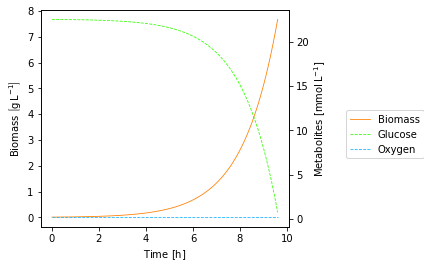

In [52]:
# Plotting the DFBA
plot_concentrations(concentrations)

**Adding production of 5-HTP**

In [53]:
model = read_sbml_model('../data/iML1515_5htp_1st_strategy.xml')

In [54]:
# Getting the max biomass production as a variable
with model:
    model.objective = model.reactions.BIOMASS_Ec_iML1515_core_75p37M
    bio_objective = model.optimize().objective_value

In [55]:
# Defining fba model
fba_model = model
# Adding lower bound for biomass (half of max biomass production)
fba_model.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound = bio_objective * 0.5
# Changing objective to 5HTP production
fba_model.objective = "EX_htrp"
fba_model.solver = "glpk"
dfba_model = DfbaModel(fba_model)

In [56]:
# Defining kinetic variables
X = KineticVariable("Biomass")
HTP = KineticVariable("5HTP")
Gluc = KineticVariable("Glucose")
Oxy = KineticVariable("Oxygen")

dfba_model.add_kinetic_variables([X, HTP, Gluc, Oxy])

In [57]:
# Adding exchange fluxes
mu_bio = ExchangeFlux("BIOMASS_Ec_iML1515_core_75p37M")
v_htp = ExchangeFlux("EX_htrp")
v_GL = ExchangeFlux("EX_glc__D_e")
v_O = ExchangeFlux("EX_o2_e")

dfba_model.add_exchange_fluxes([mu_bio, v_htp, v_GL, v_O])

In [58]:
# Rhs expressions
dfba_model.add_rhs_expression("Biomass", mu_bio * X)
dfba_model.add_rhs_expression("5HTP", v_htp * 220.23/1000 * X)
dfba_model.add_rhs_expression("Glucose", v_GL * 180.1559/1000 * X) # v_GL [mmol gDW^-1 h^-1] * 0.18 g/mmol * gDW/L
dfba_model.add_rhs_expression("Oxygen", 0) # O2 is kept constant

In [59]:
# Adding bounds for oxygen
vmax_o2 = 15 # [mmol gDW^-1 h^-1]
Ko = 0.024 # mmol/L O2 Michaelis-Mentent constant
dfba_model.add_exchange_flux_lb("EX_o2_e", vmax_o2 * (Oxy / (Ko + Oxy)), Oxy)

In [60]:
# Adding bounds for glucose
vmax_glc = 10.5 # [mmol gDW^-1 h^-1]
Kg = 0.0027 # g/L Glucose Michaelis-Mentent constant
dfba_model.add_exchange_flux_lb("EX_glc__D_e", vmax_glc * (Gluc / (Kg + Gluc)), Gluc)

In [61]:
# add initial conditions and launch simulation
dfba_model.add_initial_conditions(
    {
        "Biomass": 0.01, # (gDW/L)
        "5HTP": 0.00, # (gDW/L)
        "Glucose": 22.0, # (g/L)   [Kopp et al. 2018]
        "Oxygen": 0.24,  # (mmol/L)
    }
)
concentrations, trajectories = dfba_model.simulate(0.0, 30.0, 0.1, ["EX_glc__D_e","EX_htrp"])

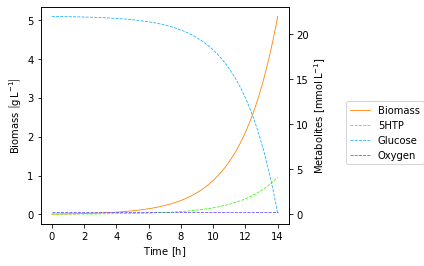

In [62]:
# Plotting DFBA with both biomass and 5-HTP production
plot_concentrations(concentrations)

**Adding Lactose to the substrate along with glucose**

In [63]:
# Defining model
fba_model = read_sbml_model('../data/iML1515_5htp_1st_strategy.xml')
fba_model.solver = "glpk"
dfba_model = DfbaModel(fba_model)

In [64]:
# Defining kinetic variables
X = KineticVariable("Biomass")
Gluc = KineticVariable("Glucose")
Lac = KineticVariable("Lactose")
Oxy = KineticVariable("Oxygen")
Eth = KineticVariable("Ethanol")

dfba_model.add_kinetic_variables([X, Gluc, Lac, Oxy, Eth])

In [65]:
# Exchange reactions
mu = ExchangeFlux("BIOMASS_Ec_iML1515_core_75p37M")
v_G = ExchangeFlux("EX_glc__D_e")
v_L = ExchangeFlux("EX_lcts_e")
v_O = ExchangeFlux("EX_o2_e")
v_E = ExchangeFlux("EX_etoh_e")


dfba_model.add_exchange_fluxes([mu, v_G, v_L, v_O, v_E])

In [66]:
# rhs expresisons
dfba_model.add_rhs_expression("Biomass", mu * X)
dfba_model.add_rhs_expression("Glucose", v_G * 180.1559/1000 * X) # v_G [mmol gDW^-1 h^-1] * 0.18 g/mmol * gDW/L
dfba_model.add_rhs_expression("Lactose", v_L * 342.3/1000 * X)
dfba_model.add_rhs_expression("Oxygen", 0) # O2 is kept constant
dfba_model.add_rhs_expression("Ethanol", v_E * 46.06844/1000 * X)

In [67]:
# Adding bounds for O2
vmax_o2 = 15 # [mmol gDW^-1 h^-1]
Ko = 0.024 # mmol/L O2 Michaelis-Mentent constant
dfba_model.add_exchange_flux_lb("EX_o2_e", vmax_o2 * (Oxy / (Ko + Oxy)), Oxy)

In [68]:
# glycose is inhibited by ethanol (Values borrowed from exercises)
vmax_glc = 10.5 # [mmol gDW^-1 h^-1]
Kg = 0.0027 # g/L Glucose Michaelis-Mentent constant
Kie = 20 # g/L Ethanol inhibition constant
dfba_model.add_exchange_flux_lb(
    "EX_glc__D_e",
    vmax_glc * (Gluc / (Kg + Gluc)) * (1 / (1 + Eth / Kie)),
    Gluc
)

In [69]:
# lactose is inhibited by both ethanol and glucose (experimental values are borrowed from [Chen et al. 2008])
vmax_lac = 1.1 # [mmol gDW^-1 h^-1]
Kl = 0.001 # g/L lactose Michaelis-Mentent constant 
Kie = 20 # g/L Ethanol inhibition constant
Kig = 0.005 # g/L Glucose inhibition constant
dfba_model.add_exchange_flux_lb(
    "EX_lcts_e",
    vmax_lac * (Lac / (Kl + Lac)) * (1 / (1 + Eth / Kie)) * (1 / (1 + Gluc / Kig)),
    Lac,
)

In [70]:
dfba_model.add_initial_conditions(
    {
        "Biomass": 0.01, # (gDW/L)
        "Glucose": 22.5, # (g/L)
        "Lactose": 20.0,   # (g/L)
        "Oxygen": 0.24,  # (mmol/L)
        "Ethanol": 0.0,  # (g/L)
    }
)
concentrations, trajectories = dfba_model.simulate(0.0, 25.0, 0.1, ["EX_glc__D_e", "EX_glyc_e", "EX_etoh_e"])

In [71]:
# from dfba.plot.plotly import *
from dfba.plot.matplotlib import *

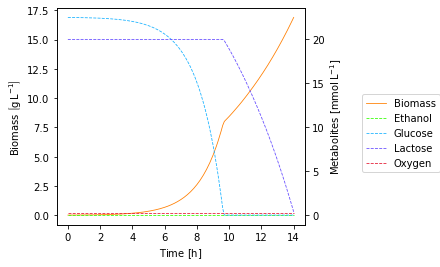

In [72]:
plot_concentrations(concentrations)